In [1]:
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, auc, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
col_names = ["qty_dot_url","qty_hyphen_url","qty_underline_url","qty_slash_url","qty_questionmark_url","qty_equal_url","qty_at_url",
             "qty_and_url","qty_exclamation_url","qty_space_url","qty_tilde_url","qty_comma_url","qty_plus_url","qty_asterisk_url",
             "qty_hashtag_url","qty_dollar_url","qty_percent_url","qty_tld_url","length_url","qty_dot_domain","qty_hyphen_domain",
             "qty_underline_domain","qty_slash_domain","qty_questionmark_domain","qty_equal_domain","qty_at_domain","qty_and_domain",
             "qty_exclamation_domain","qty_space_domain","qty_tilde_domain","qty_comma_domain","qty_plus_domain","qty_asterisk_domain",
             "qty_hashtag_domain","qty_dollar_domain","qty_percent_domain","qty_vowels_domain","domain_length","domain_in_ip",
             "server_client_domain","qty_dot_directory","qty_hyphen_directory","qty_underline_directory","qty_slash_directory",
             "qty_questionmark_directory","qty_equal_directory","qty_at_directory","qty_and_directory","qty_exclamation_directory",
             "qty_space_directory","qty_tilde_directory","qty_comma_directory","qty_plus_directory","qty_asterisk_directory","qty_hashtag_directory",
             "qty_dollar_directory","qty_percent_directory","directory_length","qty_dot_file","qty_hyphen_file","qty_underline_file","qty_slash_file",
             "qty_questionmark_file","qty_equal_file","qty_at_file","qty_and_file","qty_exclamation_file","qty_space_file","qty_tilde_file",
             "qty_comma_file","qty_plus_file","qty_asterisk_file","qty_hashtag_file","qty_dollar_file","qty_percent_file","file_length",
             "qty_dot_params","qty_hyphen_params","qty_underline_params","qty_slash_params","qty_questionmark_params","qty_equal_params",
             "qty_at_params","qty_and_params","qty_exclamation_params","qty_space_params","qty_tilde_params","qty_comma_params",
             "qty_plus_params","qty_asterisk_params","qty_hashtag_params","qty_dollar_params","qty_percent_params","params_length",
             "tld_present_params","qty_params","email_in_url","time_response","domain_spf","asn_ip","time_domain_activation","time_domain_expiration",
             "qty_ip_resolved","qty_nameservers","qty_mx_servers","ttl_hostname","tls_ssl_certificate","qty_redirects","url_google_index",
             "domain_google_index","url_shortened","phishing"]

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/dataset_full.csv', names=col_names, encoding='latin-1')

<ipython-input-3-e387f5733364>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/GregaVrbancic/Phishing-Dataset/master/dataset_full.csv', names=col_names, encoding='latin-1')


In [4]:
df = df[1:]

In [5]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 1 to 88647
Columns: 112 entries, qty_dot_url to phishing
dtypes: object(112)
memory usage: 75.7+ MB
(88647, 112)


In [6]:
df.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
1,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
2,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
3,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
4,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
5,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


## Pre processing

### Standadization

In [7]:
#selection of numeric attribute columns from the dataset
numcol = df.select_dtypes(include = 'number').columns

from sklearn.preprocessing import StandardScaler

#normalizing using standard scalar
std_scalar = StandardScaler()
for i in numcol:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scalar.fit_transform(arr.reshape(len(arr),1))

In [8]:
df.head(5)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
1,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
2,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
3,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
4,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
5,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


### Feature Extraction

In [9]:
df = df.astype(float)


In [11]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr= df.corr()
corr_y = abs(corr['phishing'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)


directory_length              0.525694
qty_underline_directory       0.623106
qty_underline_file            0.636585
qty_asterisk_directory        0.651520
qty_at_directory              0.682272
qty_asterisk_file             0.684798
qty_dot_directory             0.690271
qty_slash_url                 0.699061
qty_and_directory             0.702265
qty_plus_directory            0.732842
qty_dot_file                  0.733008
qty_dollar_directory          0.734923
qty_plus_file                 0.735140
qty_equal_directory           0.737922
qty_tilde_directory           0.739571
qty_space_directory           0.740026
qty_exclamation_directory     0.742187
qty_comma_directory           0.742251
qty_comma_file                0.742364
qty_space_file                0.742749
qty_equal_file                0.743692
qty_tilde_file                0.744657
qty_and_file                  0.744860
qty_exclamation_file          0.745059
qty_at_file                   0.745509
qty_hashtag_file         

In [12]:
highest_corr.index

Index(['qty_slash_url', 'qty_dot_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'directory_length', 'qty_dot_file',
       'qty_underline_file', 'qty_slash_file', 'qty_questionmark_file',
       'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file',
       'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'phishing'],
      dtype='object')

In [13]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = df[['qty_slash_url', 'qty_dot_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_dot_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file', 'phishing']]
     

In [14]:
numeric_bin

,qty_slash_url,qty_dot_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,...,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,phishing
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88643,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
88644,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
88645,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
88646,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Deep Learning

bin_dataset is sufficient for Deep Learning. first n-4 are x and intrusion is Y

In [15]:
df2 = numeric_bin.copy()
#df2.to_csv("bin_data.csv")
df2 = df2.astype('float32')

In [16]:
##create input and output vectors
X = df2.iloc[:,0:df2.shape[1]-1]
Y = df2[['phishing']]
print(X.shape, Y.shape)
X = X.values.reshape(df2.shape[0], df2.shape[1]-1, 1)
Y = Y.values.reshape(df2.shape[0], 1)
print(X.shape, Y.shape)

(88647, 29) (88647, 1)
(88647, 29, 1) (88647, 1)


In [17]:
Z = Y
Y = to_categorical(Y)
print(X.shape, Y.shape)

(88647, 29, 1) (88647, 2)


In [18]:
## splitting of training and testing data
#X_train,X_test,Y_train,Y_test = X[:125973, :], X[125973:, :], Y[:125973, :], Y[125973:, :]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [19]:
print(X_train.shape, Y_train.shape)
print(X_test.shape,  Y_test.shape)
print(X_val.shape, Y_val.shape)

(66485, 1, 29) (66485, 2)
(11081, 1, 29) (11081, 2)
(11081, 1, 29) (11081, 2)


In [20]:
sess1 = tf.compat.v1.Session()

# Alexnet

In [22]:
import keras
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
#import scikit-plot as skplt

input_shape = ( 1, 29)
num_classes = 2

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
from keras import backend
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras import backend as K
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras import backend

np.random.seed(1000)

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
	
def top5acc(y_true,y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true,y_pred,k=5)


model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=4, input_shape=input_shape, kernel_size=3,strides=1, padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv1D(filters=4, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv1D(filters=4, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv1D(filters=4, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv1D(filters=4, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling1D(pool_size=3, strides=1, padding='same'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100, input_shape=(13*13*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(60))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(20))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# (4) Compile
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy',rmse,top5acc])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 1, 4)              352       
                                                                 
 activation_9 (Activation)   (None, 1, 4)              0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 4)             0         
 1D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 1, 4)             16        
 hNormalization)                                                 
                                                                 
 conv1d_6 (Conv1D)           (None, 1, 4)              52        
                                                                 
 activation_10 (Activation)  (None, 1, 4)             

In [23]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=100, verbose=1,validation_split=0.2, shuffle=True)


Epoch 1/100
832/832 [==============================] - 7s 5ms/step - loss: 0.4209 - accuracy: 0.8348 - rmse: 0.2414 - top5acc: 1.0000 - val_loss: 0.3027 - val_accuracy: 0.8502 - val_rmse: 0.1855 - val_top5acc: 1.0000
Epoch 2/100
832/832 [==============================] - 4s 4ms/step - loss: 0.3391 - accuracy: 0.8545 - rmse: 0.2040 - top5acc: 1.0000 - val_loss: 0.2891 - val_accuracy: 0.8646 - val_rmse: 0.1857 - val_top5acc: 1.0000
Epoch 3/100
832/832 [==============================] - 4s 4ms/step - loss: 0.3220 - accuracy: 0.8585 - rmse: 0.1980 - top5acc: 1.0000 - val_loss: 0.2755 - val_accuracy: 0.8649 - val_rmse: 0.1712 - val_top5acc: 1.0000
Epoch 4/100
832/832 [==============================] - 5s 6ms/step - loss: 0.3118 - accuracy: 0.8638 - rmse: 0.1926 - top5acc: 1.0000 - val_loss: 0.2706 - val_accuracy: 0.8845 - val_rmse: 0.1715 - val_top5acc: 1.0000
Epoch 5/100
832/832 [==============================] - 3s 4ms/step - loss: 0.3062 - accuracy: 0.8687 - rmse: 0.1893 - top5acc: 1.000

347/347 [==============================] - 1s 1ms/step


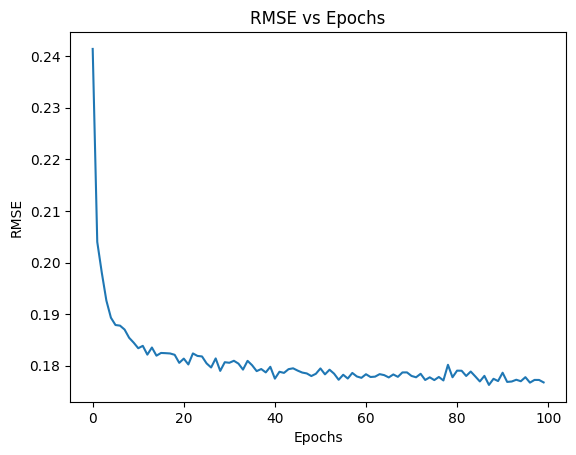

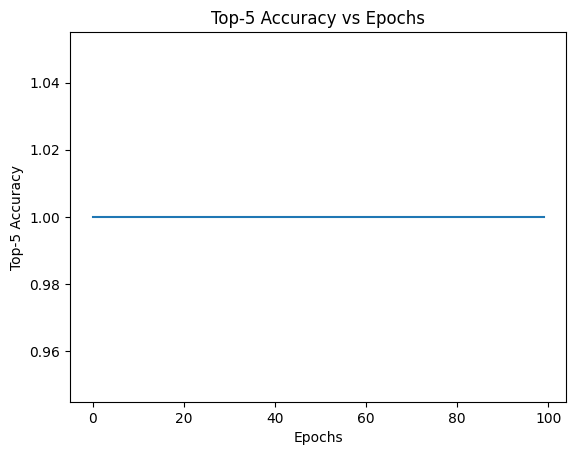

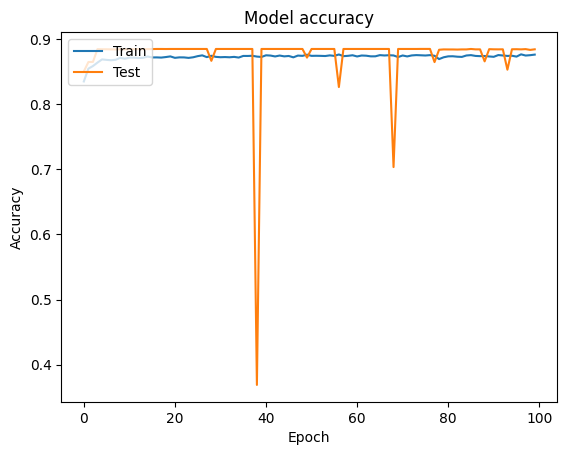

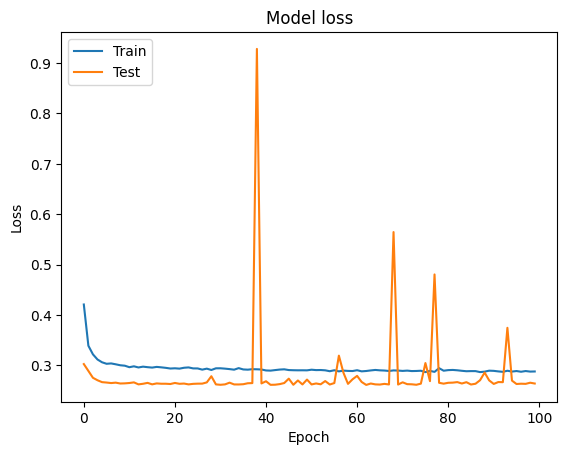

In [24]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(1)

#mytrain=open('/media/smartspace/New Volume1/FDL/FeaturestoAlexnet/alexnetresults.csv','a')
#results =csv.writer(mytrain,quoting=csv.QUOTE_ALL)

rmseval = history.history['rmse']
top5acc = history.history['top5acc']
trainacc = history.history['accuracy']
valacc = history.history['val_accuracy']
trainloss = history.history['loss']
valloss = history.history['val_loss']
'''

for i in range(0,100):
    res = [i,trainacc[i],valacc[i],trainloss[i],valloss[i],rmseval[i],top5acc[i]]
    results.writerow(res)
'''    

plt.title('RMSE vs Epochs')
plt.plot(history.history['rmse'])
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

plt.title('Top-5 Accuracy vs Epochs')
plt.plot(history.history['top5acc'])
plt.ylabel('Top-5 Accuracy')
plt.xlabel('Epochs')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [29]:
#print classification report for model
#print(classification_report(y_true, y_pred))
print(classification_report(Y_test, y_pred))

ValueError: ignored

## CNN

In [54]:
#CNN
model2 = Sequential()
model2.add(Conv1D(filters=256, kernel_size = 1, activation='tanh', dtype='float32', input_shape=(1,X.shape[1])))#256
model2.add(Conv1D(filters=128, kernel_size = 1, activation='tanh'))#128
model2.add(Conv1D(filters=64, kernel_size = 1, activation='tanh'))#64
model2.add(Conv1D(filters=32, kernel_size = 1, activation='tanh'))#32
model2.add(MaxPooling1D(pool_size=1))
model2.add(Flatten())
'''
model2.add(Conv1D(128, dropout=0.3, return_sequences=True)) #128
model2.add(Conv1D(64, dropout=0.3, return_sequences=True)) #64
model2.add(Conv1D(32))#32
'''
model2.add(Dense(100, activation='relu'))
model2.add((Dense(2, activation='softmax')))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

predicted2 = model2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=1000, callbacks=callbacks_list)


Epoch 1/100
65/67 [============================>.] - ETA: 0s - loss: 0.3024 - accuracy: 0.8685
Epoch 1: val_accuracy improved from -inf to 0.88313, saving model to weights.best.hdf5
67/67 [==============================] - 3s 18ms/step - loss: 0.3015 - accuracy: 0.8692 - val_loss: 0.2625 - val_accuracy: 0.8831
Epoch 2/100
63/67 [===========================>..] - ETA: 0s - loss: 0.2634 - accuracy: 0.8837
Epoch 2: val_accuracy did not improve from 0.88313
67/67 [==============================] - 1s 15ms/step - loss: 0.2644 - accuracy: 0.8834 - val_loss: 0.2634 - val_accuracy: 0.8831
Epoch 3/100
66/67 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.8834
Epoch 3: val_accuracy did not improve from 0.88313
67/67 [==============================] - 1s 20ms/step - loss: 0.2643 - accuracy: 0.8834 - val_loss: 0.2603 - val_accuracy: 0.8831
Epoch 4/100
66/67 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8828
Epoch 4: val_accuracy did not improve fro

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 1, 256)            7680      
                                                                 
 conv1d_19 (Conv1D)          (None, 1, 128)            32896     
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 conv1d_21 (Conv1D)          (None, 1, 32)             2080      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 32)                0         
                                                     

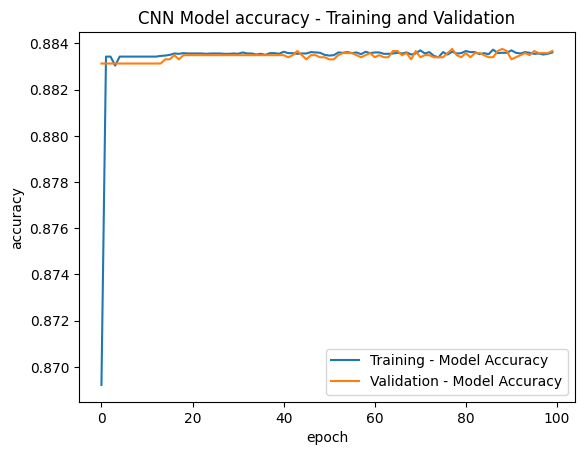

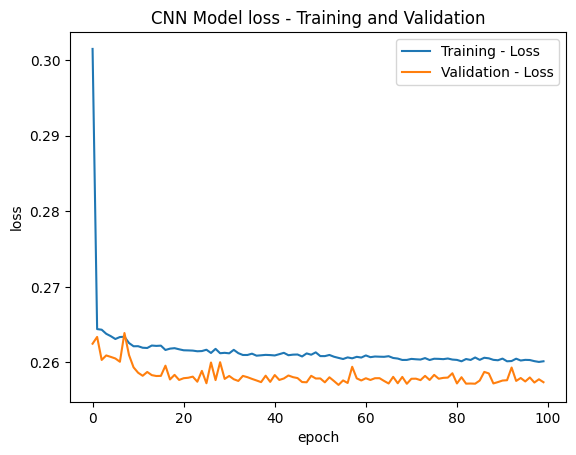

CNN Classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7174
           1       0.85      0.81      0.83      3907

    accuracy                           0.88     11081
   macro avg       0.87      0.86      0.87     11081
weighted avg       0.88      0.88      0.88     11081

CNN Confusion Matrix
[[6596  578]
 [ 749 3158]]
Accuracy Score        =     0.880245465210721
Precision Score       =     0.8452890792291221
Recall/Sensitivity    =     0.8082928077809061
Specificity           =     0.919431279620853
F1 Score              =     0.8263770770639802


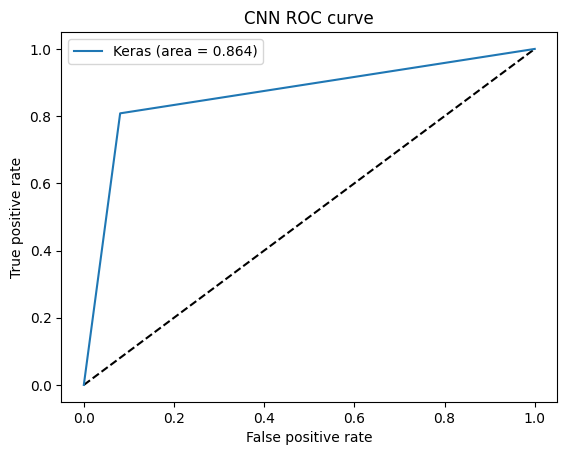

In [56]:
model2.summary()

y_pred = (model2.predict(X_test) > 0.5).astype("int32")
#y_pred = model2.predict(X_test)
print(y_pred.shape)
print(y_pred)

plt.plot(predicted2.history['accuracy'], label="Training - Model Accuracy")
plt.plot(predicted2.history['val_accuracy'], label="Validation - Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('CNN Model accuracy - Training and Validation')
plt.legend(loc='lower right')
plt.show()

plt.plot(predicted2.history['loss'], label="Training - Loss")
plt.plot(predicted2.history['val_loss'], label="Validation - Loss")
plt.title('CNN Model loss - Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

target_names = ['attack', 'normal']
print("CNN Classification report")
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

print("CNN Confusion Matrix")
print(confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

#metrics
print("Accuracy Score        =    ", accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Precision Score       =    ", precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Recall/Sensitivity    =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Specificity           =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1),pos_label=0))
print("F1 Score              =    ", f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))

fpr, tpr, threshold = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
auc_v = auc(fpr, tpr)

#plot ROC for better insight on classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_v))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('CNN ROC curve')
plt.legend(loc='best')
plt.show()


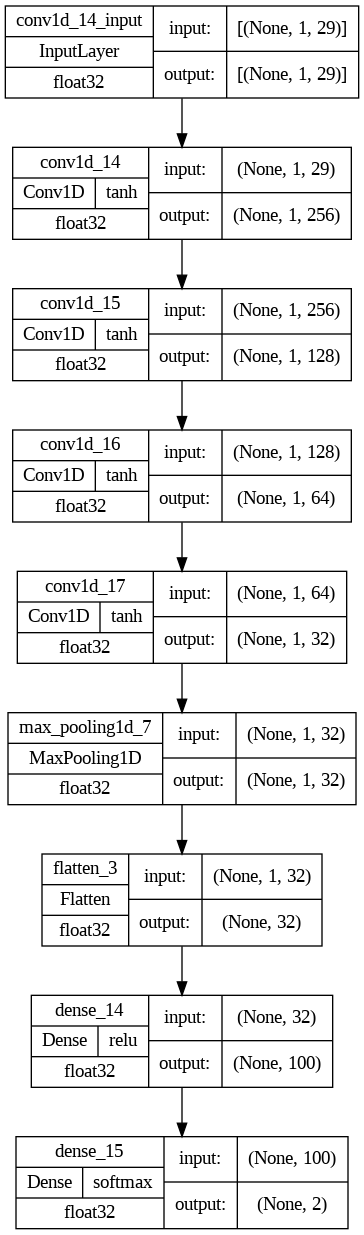

In [45]:
tf.keras.utils.plot_model(model2, to_file='CNN.png', show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True )

## RNN

In [57]:
#create model (RNN)
model3 = Sequential()
model3.add(SimpleRNN(256, dropout=0.3, return_sequences=True, input_shape=(1,X.shape[1])))#256
model3.add(SimpleRNN(128, dropout=0.3, return_sequences=True)) #128
model3.add(SimpleRNN(64, dropout=0.3, return_sequences=True)) #64
model3.add(SimpleRNN(32))#32

'''
#(For Single Layer)
model3.add(SimpleRNN(128, dropout=0.3, return_sequences=True, input_shape=(1,4))) 
model3.add(SimpleRNN(128))
'''

model3.add((Dense(2, activation='softmax')))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

predicted3= model3.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=1000 ,callbacks=callbacks_list)

Epoch 1/100
66/67 [============================>.] - ETA: 0s - loss: 0.3229 - accuracy: 0.8521
Epoch 1: val_accuracy improved from -inf to 0.86400, saving model to weights.best.hdf5
67/67 [==============================] - 5s 33ms/step - loss: 0.3228 - accuracy: 0.8520 - val_loss: 0.2705 - val_accuracy: 0.8640
Epoch 2/100
67/67 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.8625
Epoch 2: val_accuracy improved from 0.86400 to 0.88313, saving model to weights.best.hdf5
67/67 [==============================] - 2s 26ms/step - loss: 0.2835 - accuracy: 0.8625 - val_loss: 0.2628 - val_accuracy: 0.8831
Epoch 3/100
65/67 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.8716
Epoch 3: val_accuracy did not improve from 0.88313
67/67 [==============================] - 2s 26ms/step - loss: 0.2760 - accuracy: 0.8715 - val_loss: 0.2680 - val_accuracy: 0.8691
Epoch 4/100
66/67 [============================>.] - ETA: 0s - loss: 0.2735 - accuracy: 0.8748
Ep

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 1, 256)            73216     
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 1, 128)            49280     
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 1, 64)             12352     
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_22 (Dense)            (None, 2)                 66        
                                                                 
Total params: 138,018
Trainable params: 138,018
Non-trainable params: 0
_________________________________________________________________
347/347 [==============================] - 1s 2

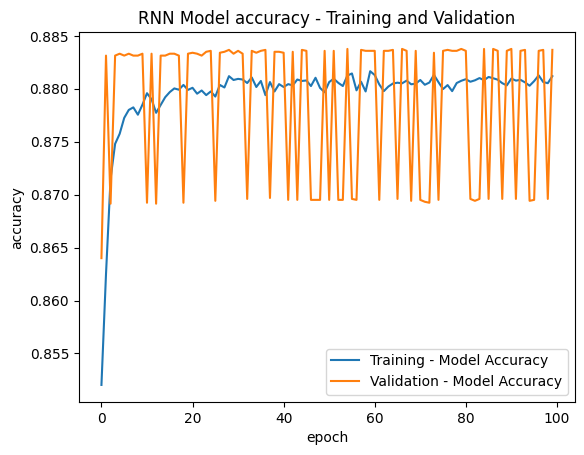

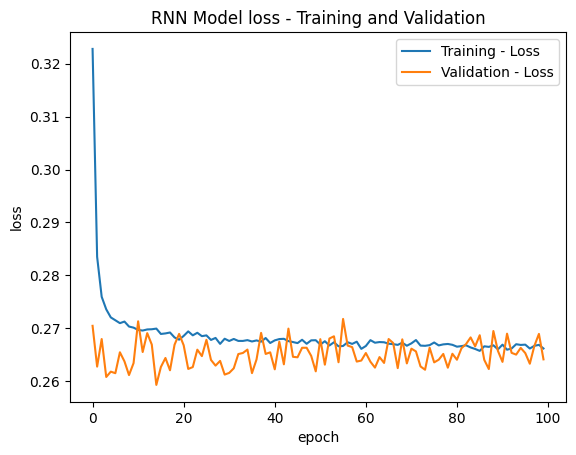

RNN Classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7174
           1       0.85      0.81      0.83      3907

    accuracy                           0.88     11081
   macro avg       0.87      0.86      0.87     11081
weighted avg       0.88      0.88      0.88     11081

RNN Confusion Matrix
[[6597  577]
 [ 750 3157]]
Accuracy Score        =     0.880245465210721
Precision Score       =     0.8454740224959829
Recall/Sensitivity    =     0.8080368569234707
Specificity           =     0.919570671870644
F1 Score              =     0.8263316319853423


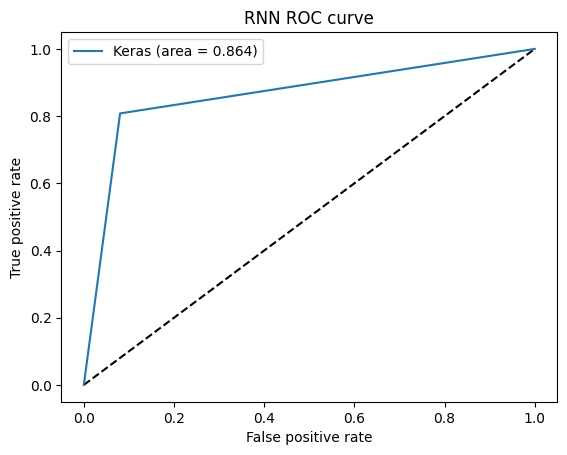

In [58]:
model3.summary()

y_pred = (model3.predict(X_test) > 0.5).astype("int32")
#y_pred = model3.predict(X_test)
print(y_pred.shape)
print(y_pred)

plt.plot(predicted3.history['accuracy'], label="Training - Model Accuracy")
plt.plot(predicted3.history['val_accuracy'], label="Validation - Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('RNN Model accuracy - Training and Validation')
plt.legend(loc='lower right')
plt.show()

plt.plot(predicted3.history['loss'], label="Training - Loss")
plt.plot(predicted3.history['val_loss'], label="Validation - Loss")
plt.title('RNN Model loss - Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

target_names = ['attack', 'normal']
print("RNN Classification report")
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

print("RNN Confusion Matrix")
print(confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

#metrics
print("Accuracy Score        =    ", accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Precision Score       =    ", precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Recall/Sensitivity    =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Specificity           =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1),pos_label=0))
print("F1 Score              =    ", f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))

fpr, tpr, threshold = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
auc_v = auc(fpr, tpr)

#plot ROC for better insight on classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_v))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RNN ROC curve')
plt.legend(loc='best')
plt.show()


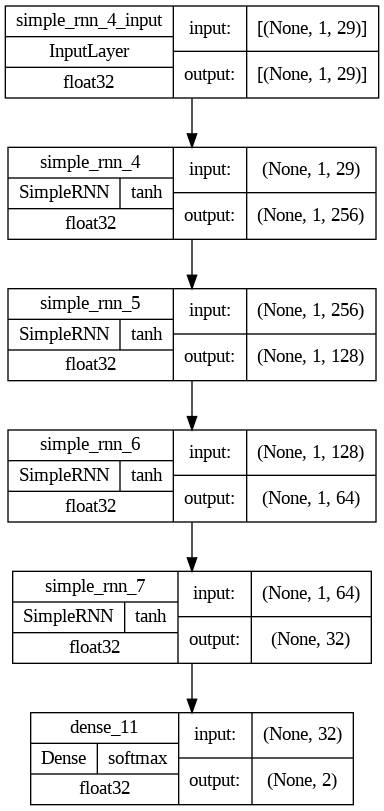

In [36]:
tf.keras.utils.plot_model(model3, to_file='RNN.png', show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True )

## LSTM

In [59]:
# create the model (LSTM)
# For stacked Layer
embedding_vecor_length = 1
model = Sequential()
model.add(LSTM(256, dropout=0.3, return_sequences=True, input_shape=(1,X.shape[1]))) #256
model.add(LSTM(128, dropout=0.3, return_sequences=True)) #128
model.add(LSTM(64, dropout=0.3, return_sequences=True)) #64
model.add(LSTM(32)) #32

'''
(For Single Layer)
model.add(LSTM(128, dropout=0.3, return_sequences=True, input_shape=(1,4))) 
model.add(LSTM(128))
'''

model.add((Dense(2, activation='softmax')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

predicted = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=1000, callbacks=callbacks_list)

Epoch 1/100
66/67 [============================>.] - ETA: 0s - loss: 0.4612 - accuracy: 0.8243
Epoch 1: val_accuracy improved from -inf to 0.86400, saving model to weights.best.hdf5
67/67 [==============================] - 12s 89ms/step - loss: 0.4604 - accuracy: 0.8244 - val_loss: 0.3182 - val_accuracy: 0.8640
Epoch 2/100
66/67 [============================>.] - ETA: 0s - loss: 0.3018 - accuracy: 0.8614
Epoch 2: val_accuracy improved from 0.86400 to 0.88331, saving model to weights.best.hdf5
67/67 [==============================] - 5s 82ms/step - loss: 0.3017 - accuracy: 0.8614 - val_loss: 0.2697 - val_accuracy: 0.8833
Epoch 3/100
66/67 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8714
Epoch 3: val_accuracy did not improve from 0.88331
67/67 [==============================] - 5s 73ms/step - loss: 0.2765 - accuracy: 0.8713 - val_loss: 0.2668 - val_accuracy: 0.8833
Epoch 4/100
66/67 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.8738
E

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 256)            292864    
                                                                 
 lstm_9 (LSTM)               (None, 1, 128)            197120    
                                                                 
 lstm_10 (LSTM)              (None, 1, 64)             49408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_23 (Dense)            (None, 2)                 66        
                                                                 
Total params: 551,874
Trainable params: 551,874
Non-trainable params: 0
_________________________________________________________________
347/347 [==============================] - 2s 4

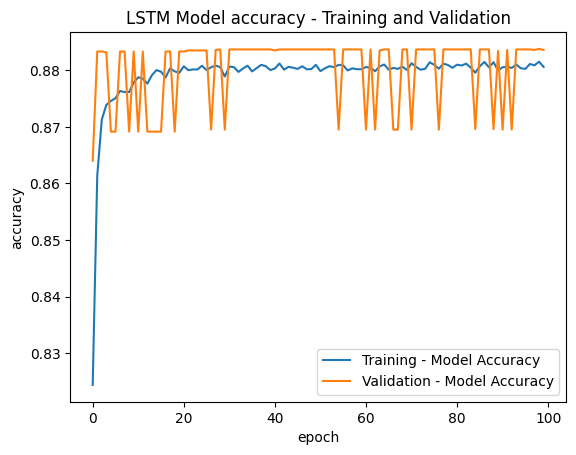

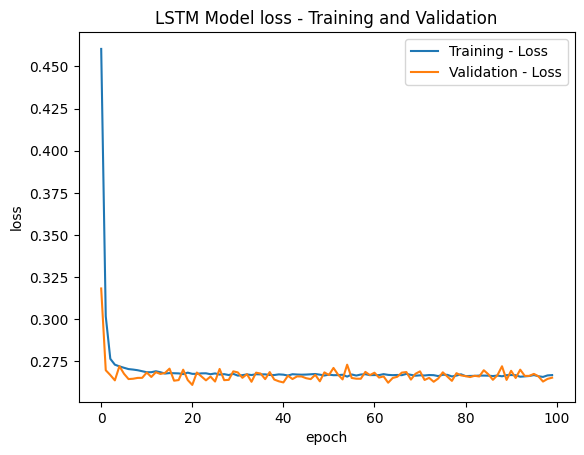

LSTM Classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7174
           1       0.85      0.81      0.83      3907

    accuracy                           0.88     11081
   macro avg       0.87      0.86      0.87     11081
weighted avg       0.88      0.88      0.88     11081

LSTM Confusion Matrix
[[6596  578]
 [ 750 3157]]
Accuracy Score        =     0.8801552206479559
Precision Score       =     0.84524765729585
Recall/Sensitivity    =     0.8080368569234707
Specificity           =     0.919431279620853
F1 Score              =     0.8262235017011255


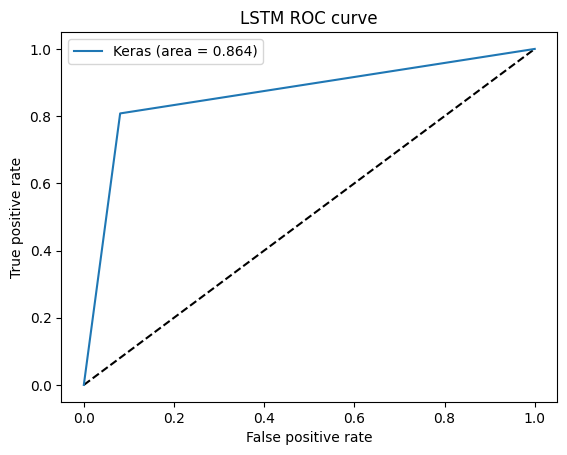

In [60]:
model.summary()

y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict(X_test)
print(y_pred.shape)
print(y_pred)

plt.plot(predicted.history['accuracy'], label="Training - Model Accuracy")
plt.plot(predicted.history['val_accuracy'], label="Validation - Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('LSTM Model accuracy - Training and Validation')
plt.legend(loc='lower right')
plt.show()

plt.plot(predicted.history['loss'], label="Training - Loss")
plt.plot(predicted.history['val_loss'], label="Validation - Loss")
plt.title('LSTM Model loss - Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

target_names = ['attack', 'normal']
print("LSTM Classification report")
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

print("LSTM Confusion Matrix")
print(confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

#metrics
print("Accuracy Score        =    ", accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Precision Score       =    ", precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Recall/Sensitivity    =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Specificity           =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1),pos_label=0))
print("F1 Score              =    ", f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))

fpr, tpr, threshold = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
auc_v = auc(fpr, tpr)

#plot ROC for better insight on classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_v))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LSTM ROC curve')
plt.legend(loc='best')
plt.show()


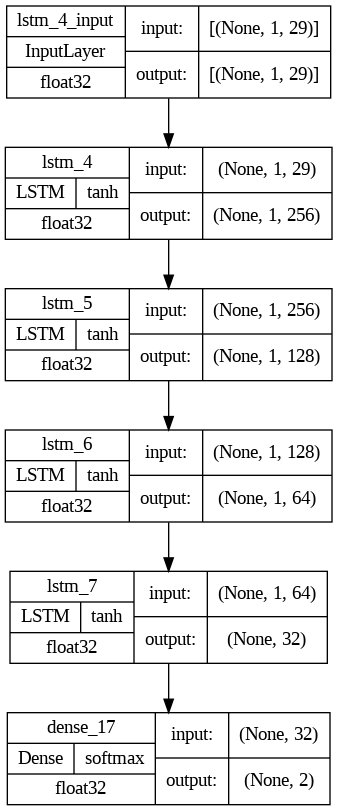

In [50]:
tf.keras.utils.plot_model(model, to_file='LSTM.png', show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True )

## GRU

In [53]:
#create model (GRU)
# For stacked Layer
model1 = Sequential()
model1.add(GRU(256, dropout=0.3, return_sequences=True, input_shape=(1,X.shape[1])))#256
model1.add(GRU(128, dropout=0.3, return_sequences=True)) #128
model1.add(GRU(64, dropout=0.3, return_sequences=True)) #64
model1.add(GRU(32))#32

'''
(For Single Layer)
model1.add(GRU(128, dropout=0.3, return_sequences=True, input_shape=(1,4))) 
model1.add(GRU(128))
'''

model1.add((Dense(2, activation='softmax')))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

predicted1 = model1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=1000, callbacks=callbacks_list)

Epoch 1/100
66/67 [============================>.] - ETA: 0s - loss: 0.3424 - accuracy: 0.8575
Epoch 1: val_accuracy improved from -inf to 0.86400, saving model to weights.best.hdf5
67/67 [==============================] - 12s 89ms/step - loss: 0.3420 - accuracy: 0.8575 - val_loss: 0.2649 - val_accuracy: 0.8640
Epoch 2/100
66/67 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.8616
Epoch 2: val_accuracy improved from 0.86400 to 0.88313, saving model to weights.best.hdf5
67/67 [==============================] - 4s 61ms/step - loss: 0.2768 - accuracy: 0.8616 - val_loss: 0.2650 - val_accuracy: 0.8831
Epoch 3/100
66/67 [============================>.] - ETA: 0s - loss: 0.2736 - accuracy: 0.8681
Epoch 3: val_accuracy did not improve from 0.88313
67/67 [==============================] - 4s 60ms/step - loss: 0.2737 - accuracy: 0.8681 - val_loss: 0.2693 - val_accuracy: 0.8691
Epoch 4/100
66/67 [============================>.] - ETA: 0s - loss: 0.2723 - accuracy: 0.8738
E

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 1, 256)            220416    
                                                                 
 gru_9 (GRU)                 (None, 1, 128)            148224    
                                                                 
 gru_10 (GRU)                (None, 1, 64)             37248     
                                                                 
 gru_11 (GRU)                (None, 32)                9408      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 415,362
Trainable params: 415,362
Non-trainable params: 0
_________________________________________________________________
347/347 [==============================] - 2s 3

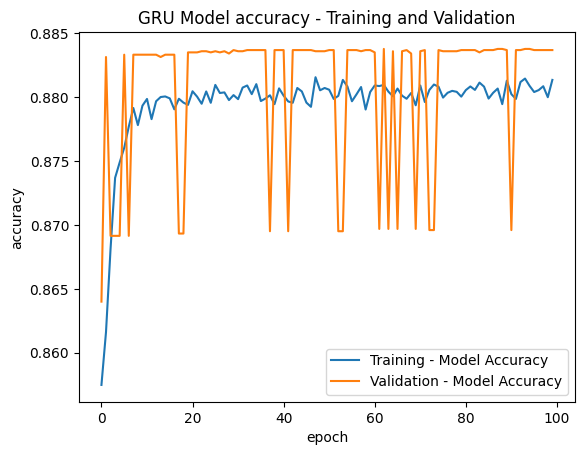

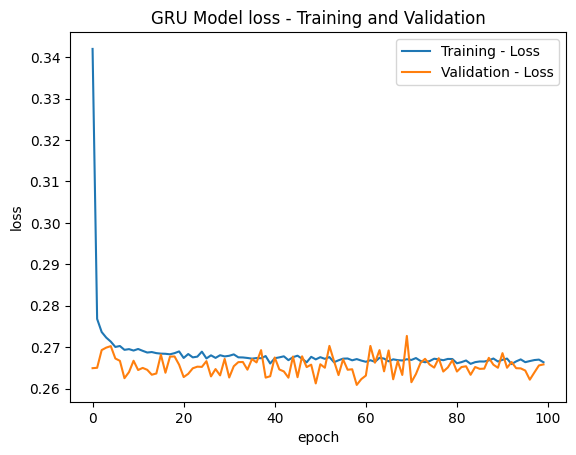

GRU Classification report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7174
           1       0.85      0.81      0.83      3907

    accuracy                           0.88     11081
   macro avg       0.87      0.86      0.87     11081
weighted avg       0.88      0.88      0.88     11081

GRU Confusion Matrix
[[6597  577]
 [ 750 3157]]
Accuracy Score        =     0.880245465210721
Precision Score       =     0.8454740224959829
Recall/Sensitivity    =     0.8080368569234707
Specificity           =     0.919570671870644
F1 Score              =     0.8263316319853423


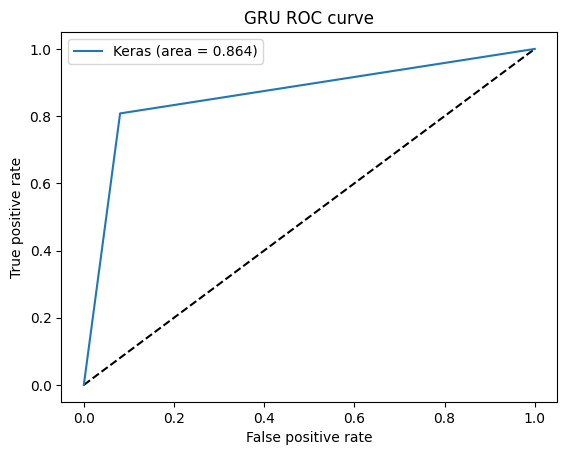

In [55]:
model1.summary()

y_pred = (model1.predict(X_test) > 0.5).astype("int32")
#y_pred = model1.predict(X_test)
print(y_pred.shape)
print(y_pred)

plt.plot(predicted1.history['accuracy'], label="Training - Model Accuracy")
plt.plot(predicted1.history['val_accuracy'], label="Validation - Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('GRU Model accuracy - Training and Validation')
plt.legend(loc='lower right')
plt.show()

plt.plot(predicted1.history['loss'], label="Training - Loss")
plt.plot(predicted1.history['val_loss'], label="Validation - Loss")
plt.title('GRU Model loss - Training and Validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

target_names = ['attack', 'normal']
print("GRU Classification report")
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

print("GRU Confusion Matrix")
print(confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1) ))

#metrics
print("Accuracy Score        =    ", accuracy_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Precision Score       =    ", precision_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Recall/Sensitivity    =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))
print("Specificity           =    ", recall_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1),pos_label=0))
print("F1 Score              =    ", f1_score(Y_test.argmax(axis=1),y_pred.argmax(axis=1)))

fpr, tpr, threshold = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
auc_v = auc(fpr, tpr)

#plot ROC for better insight on classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_v))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GRU ROC curve')
plt.legend(loc='best')
plt.show()


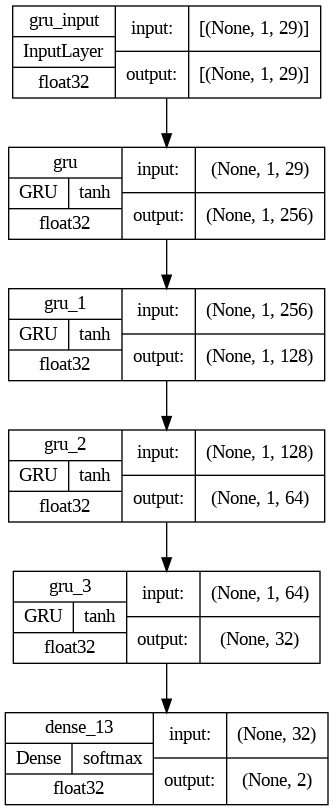

In [42]:
tf.keras.utils.plot_model(model1, to_file='GRU.png', show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True )